In [ ]:
import numpy as np
import matplotlib.pyplot as plt

In [ ]:
np.random.seed(0)

r = "#A60628"
b = "#348ABD"

# PCA와 공분산 행렬의 고유벡터PCA and the Eigen Vectors of Covariance Matrix

---

2021.09.22 조준우 (metamath@gmail.com) 


이 글에서는 머신러닝에서 많이 이야기되는 PCA알고리즘에 대한 전반적인 내용을 살펴본 후 PCA 알고리즘의 핵심 내용인 왜 공분산 행렬의 고유벡터가 주성분이 되는지 알아보도록 하겠습니다.

## 보통 PCA에 대한 전반적인 내용

다음 그림처럼 어떤 방향으로도 퍼져있지 않고 동그랗고 균일하게 뭉쳐있는 데이터 $X$가 있다고 가정합시다.

(500, 2)


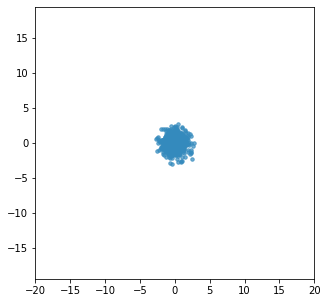

In [ ]:
X = np.random.multivariate_normal([0,0], np.array([1,0,0,1]).reshape(2,2), 500)
print(X.shape)

fig = plt.figure(figsize=(5,5))
ax = plt.axes()

ax.plot(X[:,0], X[:,1], '.',  color=b, markersize=7, alpha=0.7)
ax.axis('equal')
ax.set_xlim(-20, 20)
ax.set_ylim(-20, 20)

plt.show()


이 데이터 500개에 다음과 같은 변환행렬 $\mathbf{A}$를 곱해서 데이터를 변환합니다.

$$
\mathbf{A} = \begin{bmatrix} 6 & 3 \\ 3 & 6 \end{bmatrix}
$$

이를 수행하는 코드가 다음에 있습니다.

(500, 2)


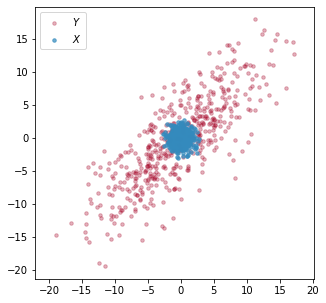

In [ ]:
A = np.array([6,3,3,6]).reshape(2,2)
# Y = AX : 원래 데이터 X를 변환행렬 A로 변환
Y = np.dot(A, X.T).T
print(Y.shape)

fig = plt.figure(figsize=(5,5))
ax = plt.axes()

ax.plot(Y[:,0], Y[:,1], '.',  color=r, markersize=7, alpha=0.3, label='$Y$')
ax.plot(X[:,0], X[:,1], '.',  color=b, markersize=7, alpha=0.7, label='$X$')
ax.legend()
ax.axis('equal')

plt.show()

$X$가 변환된 데이터 $Y$를 보면 특정 방향으로 퍼져있음을 확인할 수 있는데 이 방향은 변환 행렬 $\mathbf{A}$의 고유벡터 방향과 일치 합니다. $X$의 모든 점을 위치벡터로 생각하고 이에 대해서 $\mathbf{A}$로 변환을 시도하면 이 위치벡터들은 방향과 크기가 바뀌게 될 것입니다. 그런데 어떤 벡터에 대해서는 방향은 바뀌지 않고 크기만 바뀌게 되는데 이 벡터를 바로 고유벡터라 하고 그 때 크기가 몇 배나 바뀌었는지를 나타내는 숫자가 고유값이 되는 것입니다. 이에 대한 실시간 시뮬레이션을 [Eigenvalue-Eigenvector Visualization](https://www.geogebra.org/m/JP2XZpzV)에서 확인할 수 있습니다. 링크에 접속해서 검은색 벡터를 마우스로 클릭하고 회전을 하다보면 빨간색 변환벡터와 겹쳐지는 벡터를 발견할 수 있는데 이 벡터가 바로 고유벡터가 되며 그때 두 벡터의 크기 비가 고유값이 되는 것을 바로 눈으로 확인할 수 있습니다.  
  
아래 그림은 $\mathbf{A}$의 고유벡터를 직접 그려서 변환된 데이터와 비교한 것입니다.

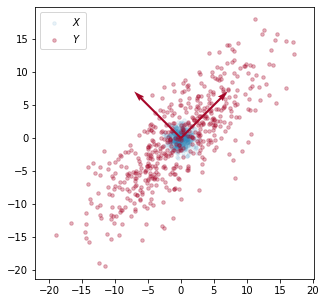

In [ ]:
# 변환행렬 A의 고유값, 고유벡터
A_eig_val, A_eig_vec = np.linalg.eig(A)
A_lamda1 = A_eig_val[0]
A_x1 = A_eig_vec[:,0]
A_lamda2 = A_eig_val[1]
A_x2 = A_eig_vec[:,1]

fig = plt.figure(figsize=(5,5))
ax = plt.axes()

ax.plot(X[:,0], X[:,1], '.',  color=b, markersize=7, alpha=0.1, label='$X$')
ax.plot(Y[:,0], Y[:,1], '.',  color=r, markersize=7, alpha=0.3, label='$Y$' )
ax.quiver(0, 0, *A_x1, angles='xy', color=r, scale_units='xy', scale=0.1, zorder=5)
ax.quiver(0, 0, *A_x2, angles='xy', color=r, scale_units='xy', scale=0.1, zorder=5)
ax.legend()
ax.axis('equal')

plt.show()

그림을 보면 변환행렬 $\mathbf{A}$의 고유벡터 방향으로 데이터가 퍼져 있는 것을 알 수 있습니다. 이 방향을 주성분Principle Direction이라 합니다. 데이터를 이렇게 퍼지게 만든 행렬, 다시 말해 특정 방향으로 분산을 가지게 만든 변환 행렬을 안다면 그 행렬의 고유벡터를 구해서 주성분을 바로 알 수 있습니다.  
  
그런데 처음부터 가지고 있는 데이터가 아래 그림처럼 변환된 데이터라면 어떤 행렬에 의해 데이터가 이렇게 퍼지게 되었는지 알 수 없는데 어떻게 주성분을 알아낼 수 있을까요?

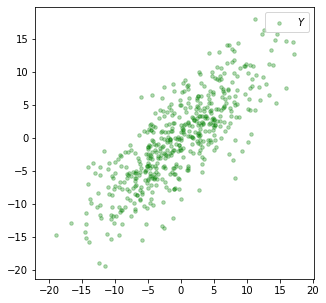

In [ ]:
fig = plt.figure(figsize=(5,5))
ax = plt.axes()

ax.plot(Y[:,0], Y[:,1], '.',  color='g', markersize=7, alpha=0.3, label='$Y$' )
ax.legend()
ax.axis('equal')

plt.show()

PCA 알고리즘은 변환된 데이터 $Y$의 공분산 행렬을 구하고 그 행렬의 고유벡터를 구하면 주성분을 알 수 있다고 이야기 합니다. 직접 구해보겠습니다.

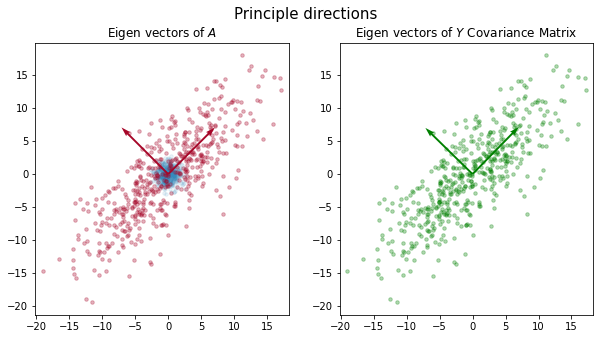

변환 행렬
[[6 3]
 [3 6]]
변환 행렬의 고유값 : 9.000000,3.000000
변환 행렬의 고유벡터
[[ 0.70710678 -0.70710678]
 [ 0.70710678  0.70710678]]


변환 데이터의 공분산 행렬
[[42.83742878 34.66774988]
 [34.66774988 44.24629644]]
공분산 행렬의 고유값
[78.21676865  8.86695657]
공분산 행렬의 고유벡터
[[ 0.69988736 -0.71425324]
 [ 0.71425324  0.69988736]]


In [ ]:
# 변환 후 데이터 Y의 공분산 행렬 COV
COV = np.cov(Y.T)

# 공분산 행렬의 고유값과 고유벡터
COV_eig_val, COV_eig_vec = np.linalg.eig(COV)

# 큰 고유값을 0번에 놓기 위해 위치 바꾸기
COV_eig_val = COV_eig_val[[1,0]]   
# 연관되는 고유벡터도 같이 바꾸기
COV_eig_vec = COV_eig_vec[:,[1,0]] 

# 큰 고유값에 해당하는 고유벡터 방향 바꾸기
# 고유벡터의 방향은 예상했던 방향 반대방향으로 구해질 수 있기 때문에
# 행렬 A에서 구해지는 고유벡터와 방향을 일치시키기 위해 -1 곱해줌
COV_eig_vec[:,0] *= -1 

# 공분산 행렬의 고유값과 고유벡터를 각 변수에 할당하기
COV_lamda1 = COV_eig_val[0]
COV_x1 = COV_eig_vec[:,0]
COV_lamda2 = COV_eig_val[1]
COV_x2 = COV_eig_vec[:,1]

fig = plt.figure(figsize=(10,5))
ax1 = fig.add_subplot(1, 2, 1)
ax2 = fig.add_subplot(1, 2, 2)

ax1.plot(X[:,0], X[:,1], '.',  color=b, markersize=7, alpha=0.1)
ax1.plot(Y[:,0], Y[:,1], '.',  color=r, markersize=7, alpha=0.3)
ax1.quiver(0, 0, *A_x1, angles='xy', color=r, scale_units='xy', scale=0.1, zorder=5)
ax1.quiver(0, 0, *A_x2, angles='xy', color=r, scale_units='xy', scale=0.1, zorder=5)
ax1.set_title(r'Eigen vectors of $A$')
ax1.axis('equal')

ax2.plot(Y[:,0], Y[:,1], '.',  color='g', markersize=7, alpha=0.3)
ax2.quiver(0, 0, *COV_x1, angles='xy', color='g',scale_units='xy', scale=0.1, zorder=5)
ax2.quiver(0, 0, *COV_x2, angles='xy', color='g',scale_units='xy', scale=0.1, zorder=5)
ax2.set_title(r"Eigen vectors of $Y$ Covariance Matrix")
ax2.axis('equal')

plt.suptitle("Principle directions", fontsize=15)
plt.show()

print("변환 행렬");                   print(A)
print("변환 행렬의 고유값 : {:f},{:f}".format( A_lamda1,  A_lamda2));
print("변환 행렬의 고유벡터");        print(A_eig_vec);  print("\n")
print("변환 데이터의 공분산 행렬");   print(COV)
print("공분산 행렬의 고유값");        print(COV_eig_val)
print("공분산 행렬의 고유벡터");      print(COV_eig_vec)

예상처럼 변환행렬의 고유벡터와 변환된 데이터 $Y$의 공분산 행렬의 고유벡터가 일치하는 것을 확인할 수 있습니다. 이렇게 간단하게 데이터의 주성분을 알아 낼 수 있습니다. 물론 크기가 큰 고유값과 쌍이 되는 고유벡터가 데이터의 분산이 더 큰 방향을 나타내므로 고유값의 크기를 보고 데이터 성분을 삭제하여 데이터를 줄일 수 있습니다.  
직접 작업을 해보면

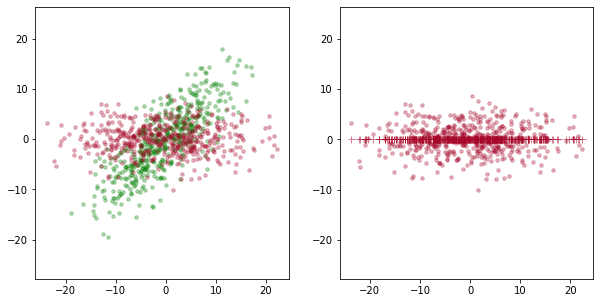

In [ ]:
# (500,2) =        (2,2)      (2,500) 
Y_prime = np.dot(COV_eig_vec.T, Y.T).T 
Y_prime_rdc = Y_prime.copy()

# 고유값 8.86에 해당하는 값을 0으로 만들어 차원을 줄인다.
Y_prime_rdc[:,1] = 0.0

fig = plt.figure(figsize=(10,5))
ax1 = fig.add_subplot(1, 2, 1)
ax2 = fig.add_subplot(1, 2, 2)

ax1.plot(Y[:,0], Y[:,1], '.',  color='g', markersize=7, alpha=0.3)
ax1.plot(Y_prime[:,0], Y_prime[:,1], '.',  color=r, markersize=7, alpha=0.3)
ax1.axis('equal')

ax2.plot(Y_prime[:,0], Y_prime[:,1], '.',  color=r, markersize=7, alpha=0.3)
ax2.plot(Y_prime_rdc[:,0], Y_prime_rdc[:,1], '+',  color=r, markersize=7, alpha=0.5)
ax2.axis('equal')

plt.show()

위 실험 결과에서 왼쪽 그림은 다음 식처럼 공분산 행렬의 고유벡터로 구성된 행렬을 $Y$에 곱해서 고유벡터로의 프로젝션(정사영projection)을 구하고 구해진 값을 $x$, $y$축에 좌표값으로 다시 그려 데이터를 $x$, $y$축상에 정렬을 한 그림입니다. 이 때 변환된 데이터를 $\color{#A60628}{Y'}$라 하면 다음과 같습니다.

$$
\mathbf{P} = \begin{bmatrix} \mathbf{u}_1 & \mathbf{u}_2 \end{bmatrix}
$$

$$
\color{#A60628}{Y'} = \mathbf{P}^{\text{T}} \color{green}{Y}
$$

초록색 데이터 포인트 $\color{green}{\mathbf{y}_i}$가 붉은색 데이터 포인트 $\color{#A60628}{\mathbf{y}'_i}$로 변환되는 구체적인 과정은 아래 그림으로 나타냈습니다.


![picture](https://drive.google.com/uc?id=13L9z-GkBkNl-yMOAJeyhMT6kJ6l6obBc)  
Figure 1: 주성분으로의 프로젝션

$\mathbf{y}_i$의 $\mathbf{u}_1$, $\mathbf{u}_2$축으로 좌표값은 각 벡터로의 프로젝션이 되는데 이 값들은 그림처럼 $|\mathbf{y}_i| \cos \theta$, $|\mathbf{y}_i| \cos \gamma$로 구할 수 있습니다. 그런데 $\mathbf{u}_1$, $\mathbf{u}_2$는 단위벡터이므로 이 값은 $\mathbf{u}_1$, $\mathbf{u}_2$를 $\mathbf{y}_i$와 내적한 값과 같게 됩니다. 따라서 이 내적한 값을 $x$, $y$축에 대한 좌표값으로 하여 데이터를 다시 그리면 $x, $y축과 $\mathbf{u}_1$, $\mathbf{u}_2$벡터가 이루는 각도만큼 회전변환되어 데이터가 $x$, $y$축 상에 정렬되게 됩니다.  

이제 데이터가 좌표축에 정렬되었으니 변화가 작은 좌표축에 대한 값을 모두 0으로 만들어 버립니다. 그렇게 한 그림이 오른쪽 그림입니다. 물론 애초에 $\mathbf{P}$ 행렬의 두번째 열 $\mathbf{u}_2$를 영벡터로 하고 곱해도 같은 효과를 내게 됩니다. 이렇게 중요하지 않은(변화량이 적은) 좌표축에 대한 값이 사라진 데이터를 다시 원래대로 되돌립니다.

다음 식처럼 $\mathbf{P}^{\text{T}}$의 역행렬을 $\color{#A60628}{Y'}$에 곱해서 역변환을 수행합니다.

$$
\color{#A60628}{Y''} = \mathbf{P}^{-\text{T}} \color{#A60628}{Y'}
$$

그런데 $\mathbf{P}^{\text{T}}$는 직교행렬orthogonal matrix이므로 전치만으로 간단하게 역행렬이 구해지므로 

$$
\color{#A60628}{Y''} = \mathbf{P} \color{#A60628}{Y'}
$$

처럼 해도 동일한 결과를 얻을 수 있습니다.

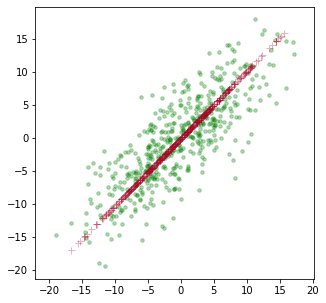

In [ ]:
# 역변환을 통해 원래 차원으로 되돌린다.
Y_2prime = np.linalg.solve(COV_eig_vec.T , Y_prime_rdc.T).T

# 고유벡터로 구성된 행렬은 직교행렬(orthogonal matrix)이므로 그냥 전치시키면
# 역행렬이 됨
# Y_2prime = np.dot(COV_eig_vec, Y_prime_rdc.T).T

fig = plt.figure(figsize=(5,5))
ax = plt.axes()
ax.plot(Y[:,0], Y[:,1], '.',  color='g', markersize=7, alpha=0.3)
ax.plot(Y_2prime[:,0], Y_2prime[:,1], '+',  color=r, markersize=7, alpha=0.3)
ax.axis('equal')
plt.show()

최종 변환된 데이터를 보면 분산이 상대적으로 작은 주성분 방향으로의 성분은 사라진 것을 확인할 수 있습니다.

여기까지가 보통 많이 접할 수 있는 PCA에 대한 설명입니다. 하지만 적어도 제가 생각하기에는 가장 중요한 의문점이 하나 남아있는데요, 어째서 공분산 행렬의 고유벡터가 데이터의 최대 분산 방향을 가르키는 것일까요? 여기에 대한 합리적인 답을 하기 전까지는 PCA가 왜 작동하는지 제대로 이야기할 수 없다고 해도 과언이 아니라 생각합니다.

## 공분산 행렬의 고유벡터와 분산 최대화

zero centered $m$차원 데이터 $\mathbf{x}_i$가 있을 때(여기서 부터 데이터 포인트에 대한 기호를 $\mathbf{y}$가 아니라 일반적인 $\mathbf{x}$로 표시 함.) 임의의 단위벡터 $\mathbf{u}$로의 프로젝션은 $\mathbf{u}^{\text{T}}\mathbf{x}_i$ 입니다. 이것은 내적 연산이기 때문에 $\mathbf{x}_i$의 차원이 아무리 높아도 프로젝션 후는 숫자 하나가 되면 이 숫자는 $\mathbf{u}$로의 원점에서 부터 거리 즉, $\mathbf{u}$축상의 좌표값이 됩니다.


![picture](https://drive.google.com/uc?id=1h2xBYuifKnMkAnxilRyI3SmluVGcuxgM)  
Figure 2: $\mathbf{u}$로 프로젝션된 $\mathbf{x}_i$들  

이 때 $\mathbf{u}$를 잘 선택해서 프로젝션 된 데이터가 원래 데이터의 퍼짐을 잘 보존하도록 분산을 크게 하고 싶은 것입니다. 다음 그림처럼 $\mathbf{u}$를 잘 선택하면 프로젝션 후에도 데이터의 퍼짐을 잘 보존할 수 있습니다.  

![picture](https://drive.google.com/uc?id=1hhPldMg9rhIyoeXjHGe5ZygyhZ3jUM2p)  
Figure 3: $\mathbf{u}$로 프로젝션된 $\mathbf{x}_i$들이 원데이터의 퍼짐을 잘 보존한 경우

따라서 PCA에서 주성분을 찾는다는 것은 프로젝션할 축 $\mathbf{u}$를 찾되 프로젝션 후 데이터의 분산이 최대가 되게 하는 $\mathbf{u}$를 찾는 것이고 앞서 살펴본 바에 따르면 그것은 공분산 행렬의 고유벡터가 되었습니다.  

지금부터 그 이유를 이야기하겠습니다.


확률변수random variable의 분산은 확률변수 제곱의 평균에서 평균의 제곱을 빼서 구할 수 있으므로 $m$차원 확률 벡터random vector $\mathbf{x}$(표기를 간략히 하기 위해 데이터에 대한 인덱스 $i$생략)에 대한 공분산 행렬은  다음처럼 쓸 수 있습니다.

$$
\begin{aligned}
\Sigma &= \begin{bmatrix}
\mathbb{E}[x_1 x_1] - \mathbb{E}[x_1]\mathbb{E}[x_1] & 
\mathbb{E}[x_1 x_2] - \mathbb{E}[x_1]\mathbb{E}[x_2] & \cdots &
\mathbb{E}[x_1 x_m] - \mathbb{E}[x_1]\mathbb{E}[x_m] \\
\mathbb{E}[x_2 x_1] - \mathbb{E}[x_2]\mathbb{E}[x_1] & 
\mathbb{E}[x_2 x_2] - \mathbb{E}[x_2]\mathbb{E}[x_2] & \cdots &
\mathbb{E}[x_2 x_m] - \mathbb{E}[x_2]\mathbb{E}[x_m] \\
\vdots & \vdots & \ddots & \vdots \\
\mathbb{E}[x_m x_1] - \mathbb{E}[x_m]\mathbb{E}[x_1] & 
\mathbb{E}[x_m x_2] - \mathbb{E}[x_m]\mathbb{E}[x_2] & \cdots &
\mathbb{E}[x_m x_m] - \mathbb{E}[x_m]\mathbb{E}[x_m]
\end{bmatrix}\\[10pt]
&= \begin{bmatrix}
\mathbb{E}[x_1 x_1] & \mathbb{E}[x_1 x_2] & \cdots & \mathbb{E}[x_1 x_m] \\
\mathbb{E}[x_2 x_1] & \mathbb{E}[x_2 x_2] & \cdots & \mathbb{E}[x_2 x_m] \\
\vdots & \vdots & \ddots & \vdots \\
\mathbb{E}[x_m x_1] & \mathbb{E}[x_m x_2] & \cdots & \mathbb{E}[x_m x_m] - 
\end{bmatrix} -
\begin{bmatrix}
\mathbb{E}[x_1] \\
\mathbb{E}[x_2] \\
\vdots \\
\mathbb{E}[x_m]
\end{bmatrix}
\begin{bmatrix}
\mathbb{E}[x_1] & \mathbb{E}[x_2] & \cdots & \mathbb{E}[x_m]
\end{bmatrix} \\[10pt]
&= \mathbb{E}\left[\mathbf{x}\mathbf{x}^{\text{T}}\right] - \mathbb{E}\left[\mathbf{x}\right] \mathbb{E}\left[ \mathbf{x}^{\text{T}}\right] 
\end{aligned}
$$

벡터 $\mathbf{x}$가 $\mathbf{u}$로 프로젝션된 값은 $\mathbf{u}^{\text{T}}\mathbf{x}$이므로 이 값에 대한 분산은 위 식에서 $\mathbf{x}$를 $\mathbf{u}^{\text{T}}\mathbf{x}$로 바꿔 쓰면

$$
\begin{aligned}
\mathbb{E}\left[ \mathbf{u}^{\text{T}} \mathbf{x} \mathbf{x}^{\text{T}} \mathbf{u} \right] - \mathbb{E}\left[ \mathbf{u}^{\text{T}} \mathbf{x} \right] \mathbb{E}\left[  \mathbf{x}^{\text{T}}\mathbf{u} \right] 
&= \mathbf{u}^{\text{T}} \mathbb{E} \left[\mathbf{x} \mathbf{x}^{\text{T}} \right]\mathbf{u} - \mathbf{u}^{\text{T}} \mathbb{E} \left[\mathbf{x}\right] \mathbb{E} \left[ \mathbf{x}^{\text{T}} \right] \mathbf{u} \\
&= \mathbf{u}^{\text{T}} \left(\mathbb{E} \left[\mathbf{x} \mathbf{x}^{\text{T}} \right] - \mathbb{E} \left[\mathbf{x}\right] \mathbb{E} \left[ \mathbf{x}^{\text{T}} \right] \right) \mathbf{u} \\
&= \mathbf{u}^{\text{T}} \Sigma \mathbf{u}
\end{aligned}
$$

따라서 정리하면 $\mathbf{u}^{\text{T}} \Sigma \mathbf{u}$를 최대로 하는 $\mathbf{u}$를 구하는 다음과 같은 최대화 문제를 풀어 원하는 $\mathbf{u}$를 구할 수 있습니다.

$$
\text{Maximize} \quad \mathbf{u}^{\text{T}} \Sigma \mathbf{u} \quad \text{subject to } \lVert \mathbf{u} \rVert = 1
$$

그런데 $\mathbf{x}$의 공분산 행렬 $\Sigma$는 대칭행렬입니다. 대칭행렬은 항상 대각화 가능[1]하며 다음처럼 고유벡터와 고유값을 이용하여 대각화 할 수 있습니다.

$$
\Sigma = \mathbf{V} \mathbf{\Lambda} \mathbf{V}^{\text{T}} 
$$


$$
\mathbf{V} = \begin{bmatrix} 
| & | & \cdots & | \\
\mathbf{v}_1 & \mathbf{v}_2 & \cdots & \mathbf{v}_m \\
| & | & \cdots & | 
\end{bmatrix}
$$

$$
\mathbf{\Lambda} = \begin{bmatrix}
\lambda_1 & 0 & \cdots & 0 \\
0 & \lambda_2 & \cdots & 0 \\
\vdots & \vdots & \ddots & \vdots \\
0 & 0 & \cdots & \lambda_m
\end{bmatrix}
$$



이 사실을 이용하여 문제를 다시 적어보면

$$
\text{Maximize} \quad \mathbf{u}^{\text{T}} \left(\mathbf{V} \mathbf{\Lambda} \mathbf{V}^{\text{T}}  \right) \mathbf{u} \quad \text{subject to } \lVert \mathbf{u} \rVert = 1
$$

식에서 $\boldsymbol{\beta} = \mathbf{V}^{\text{T}} \mathbf{u}$로 두면 변수를 $\boldsymbol{\beta}$로 바꿔서 다음처럼 쓸 수 있습니다.

$$
\text{Maximize} \quad \boldsymbol{\beta}^{\text{T}} \mathbf{\Lambda} \boldsymbol{\beta} \quad \text{subject to } \lVert \boldsymbol{\beta} \rVert = 1
$$

최종적으로 최대화 문제를 적어보면 다음과 같습니다.

$$
\text{Maximize} \quad \lambda_1 \beta^2_1 + \lambda_2 \beta^2_2 + \cdots + \lambda_m \beta^2_m \\[10pt]
\begin{aligned}
\text{subject to} &\quad \beta^2_1 + \beta^2_2 + \cdots + \beta^2_m = 1 \\
& \quad \lambda_1 \geq \lambda_2 \geq \cdots \geq \lambda_m \geq 0
\end{aligned}
$$

마지막 $\lambda_j$에 대한 제약조건은 공분산 행렬이 준양정행렬이라는 조건에서 얻어진 것입니다.[2] 이 최대화 문제를 풀기 위해 목적함수에 $-1$을 곱하고 최소화 문제로 바꿉니다.

$$
\text{Minimize} \quad - \left( \lambda_1 \beta^2_1 + \lambda_2 \beta^2_2 + \cdots + \lambda_m \beta^2_m \right) \\[10pt]
\begin{aligned}
\text{subject to} &\quad \beta^2_1 + \beta^2_2 + \cdots + \beta^2_m = 1 \\
& \quad \lambda_1 \geq \lambda_2 \geq \cdots \geq \lambda_m \geq 0
\end{aligned}
$$

위 최소화 문제를 풀기 위해 제약 조건을 이용하여 라그랑지안을 구성합니다. 이 때 라그랑지 승수는 $\zeta$로 쓰겠습니다.

$$
\mathscr{L}=- \left( \lambda_1 \beta^2_1 + \lambda_2 \beta^2_2 + \cdots + \lambda_m \beta^2_m \right) + \zeta  \left( \beta^2_1 + \beta^2_2 + \cdots + \beta^2_m \right)
$$



라그랑지안을 $\beta_j$와 $\zeta$에 대해서 각각 미분하여 얻은 식을 연립방정식으로 씁니다.

$$
\begin{aligned}
&\frac{\partial \mathscr{L}}{\partial \beta_j} = -2 \lambda_j \beta_j + 2 \zeta \beta_j \quad j = 1, ..., m \\[10pt]
&\frac{\partial \mathscr{L}}{\partial \zeta} = \beta_1 + \beta_2 + \cdots + \beta_m -1
\end{aligned}
$$

$j$를 풀어서 나열해보면

$$
\begin{align}
& 2 \beta_1  (-\lambda_1 + \zeta)=0 \tag{1} \\[5pt]
& 2 \beta_2  (-\lambda_2 + \zeta)=0 \tag{2} \\[5pt]
& \vdots \\[5pt]
& 2 \beta_m  (-\lambda_m + \zeta)=0 \tag{m} \\[5pt]
& \beta_1  + \beta_2 + \cdots + \beta_m = 1 \tag{m+1}
\end{align}
$$

위 식을 풀기 위해 m가지 경우로 나눠서 생각해보면 먼저 

[1] (1)을 만족시키기 위해서 $\zeta=\lambda_1$이면 (m+1)식에 의해 $\beta_2=0$, ..., $\beta_m=0$이 되어야 하고 $\beta_1=1$이어야 합니다.  
[2] (2)를 만족시키기 위해서 $\zeta=\lambda_2$이면 (m+1)식에 의해 $\beta_1=0$, $\beta_3=0$, ..., $\beta_m=0$이 되어야 하고 $\beta_2=1$이어야 합니다.  

마찬가지로 나머지에 대해서도 똑같고 마지막으로

[m] (m)를 만족시키기 위해서 $\zeta=\lambda_m$이면 (m+1)식에 의해 $\beta_1=0$, ..., $\beta_{m-1}=0$이 되어야 하고 $\beta_m=1$이어야 합니다.  

그런데 $ \lambda_1 \geq \lambda_2 \geq \cdots \geq \lambda_m \geq 0$ 이므로 가장 큰 고유값 $\lambda_1$과 0이 아닌 $\beta_1$이 곱해지는 [1] 경우가 목적함수가 최소가 됨을 알 수 있습니다.

따라서 최적해는 

$$
\beta_1 = 1, \beta_j = 0 \quad j = 2, ..., m
$$

이 되고 $\boldsymbol{\beta} = \mathbf{V}^{\text{T}} \mathbf{u}$이므로 

$$
\begin{bmatrix}
1 \\ 
0 \\
\vdots \\
0
\end{bmatrix} = \begin{bmatrix}
— & \mathbf{v}_1 & — \\
— & \mathbf{v}_2 & — \\
 & \vdots &  \\
— & \mathbf{v}_m & — \\
\end{bmatrix} \begin{bmatrix}
u_1 \\
u_2 \\
\vdots \\
u_m 
\end{bmatrix}
$$

이 되고, $\mathbf{V}$는 직교 행렬이므로

$$
\begin{bmatrix}
| & | & & | \\
\mathbf{v}_1 & \mathbf{v}_2 & \cdots & \mathbf{v}_m \\
| & | & & | 
\end{bmatrix}
\begin{bmatrix}
1 \\ 
0 \\
\vdots \\
0
\end{bmatrix} = \begin{bmatrix}
u_1 \\
u_2 \\
\vdots \\
u_m 
\end{bmatrix}
$$

가 됩니다. 위 식에서 좌변은 $\mathbf{v}_1$이 되어 결과적으로 구하고자 하는 $\mathbf{u}$는 

$$
\mathbf{u} = \mathbf{v}_1
$$

이 됨을 알 수 있습니다.

결론적으로 $\mathbf{x}$를 $\mathbf{u}$로 프로젝션 후 분산이 최대가 되려면 $\mathbf{u}$가 $\mathbf{x}$의 공분산 행렬에서 가장 큰 고유값과 연결된 고유벡터 $\mathbf{v}_1$이 되어야 함을 보였습니다.

## 마무리

항상 PCA 알고리즘을 볼 때 마다 왜 느닷없이 공분산 행렬을 구해서 주성분을 구하는지 제대로 설명한 우리말 문서가 없어서 아쉬웠었는데 부족하나마 그 이유를 설명하는 문서를 얕은 수준으로 작성해봤습니다. 이 글이 PCA를 공부할 때 약간의 찝찝함을 해결하는데 도움이 되길 바라겠습니다.

## 참고문헌

[1] 대칭행렬의 대각화 https://metamath1.github.io/2018/06/20/svd.html

[2] 공분산행렬은 준양정행렬positive semi-definite
https://stats.stackexchange.com/questions/52976/is-a-sample-covariance-matrix-always-symmetric-and-positive-definite
